In [75]:
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

In [207]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")


In [297]:
eth= pd.read_csv("C:\\Users\\Nikhil\\Downloads\\eth daily data.csv", parse_dates=['Date'])
eth.set_index('Date', drop=True, inplace=True)


In [298]:
eth.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2015-08-08,1,Ethereum,ETH,2.798810,0.714725,2.793760,0.753325,674188,45486894.24
2015-09-08,2,Ethereum,ETH,0.879810,0.629191,0.706136,0.701897,532170,42399573.50
2015-10-08,3,Ethereum,ETH,0.729854,0.636546,0.713989,0.708448,405283,42818364.39
2015-11-08,4,Ethereum,ETH,1.131410,0.663235,0.708087,1.067860,1463100,64569288.43
2015-12-08,5,Ethereum,ETH,1.289940,0.883608,1.058750,1.217440,2150620,73645010.99


In [299]:
eth1.tail()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
23-02-2021,2027,Ethereum,ETH,1781.409018,1378.840907,1781.409018,1570.203925,52029864713,1.800000e+11
24-02-2021,2028,Ethereum,ETH,1710.983795,1511.018963,1571.476497,1626.575705,31329000537,1.870000e+11
25-02-2021,2029,Ethereum,ETH,1670.224062,1465.058946,1625.393882,1475.703735,24481681873,1.690000e+11
26-02-2021,2030,Ethereum,ETH,1559.028891,1407.979253,1478.653270,1446.033650,31435997881,1.660000e+11
27-02-2021,2031,Ethereum,ETH,1524.932428,1433.786929,1446.929455,1459.973121,20742103233,1.680000e+11


In [300]:
eth.drop('SNo',inplace=True,axis=1)


In [301]:
eth.head()
eth.dtypes

Name          object
Symbol        object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Marketcap    float64
dtype: object

In [68]:
eth.describe()

,High,Low,Open,Close,Volume,Marketcap
count,2031.000000,2031.000000,2031.000000,2031.000000,2.031000e+03,2.031000e+03
mean,267.068034,246.986450,257.490557,258.142275,5.429599e+09,2.698693e+10
std,322.096221,292.253460,308.347903,309.321155,8.100359e+09,3.347269e+10
min,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,13.221850,12.515050,12.858200,12.866100,2.848855e+07,1.086243e+09
50%,189.088865,180.317159,184.943356,185.028722,1.844270e+09,1.972963e+10
75%,342.238919,317.625992,332.716492,333.370499,7.944177e+09,3.280357e+10
max,2036.286493,1896.684508,1959.902977,1960.164744,6.073363e+10,2.250000e+11


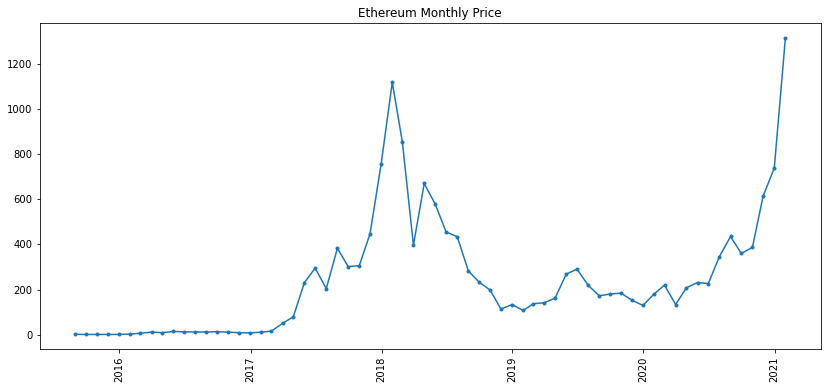

In [208]:
plt.figure(figsize=(14,6))
plt.plot(eth.asfreq('M').Close, marker='.')
plt.title('Ethereum Monthly Price')
plt.xticks(rotation=90)
plt.show()

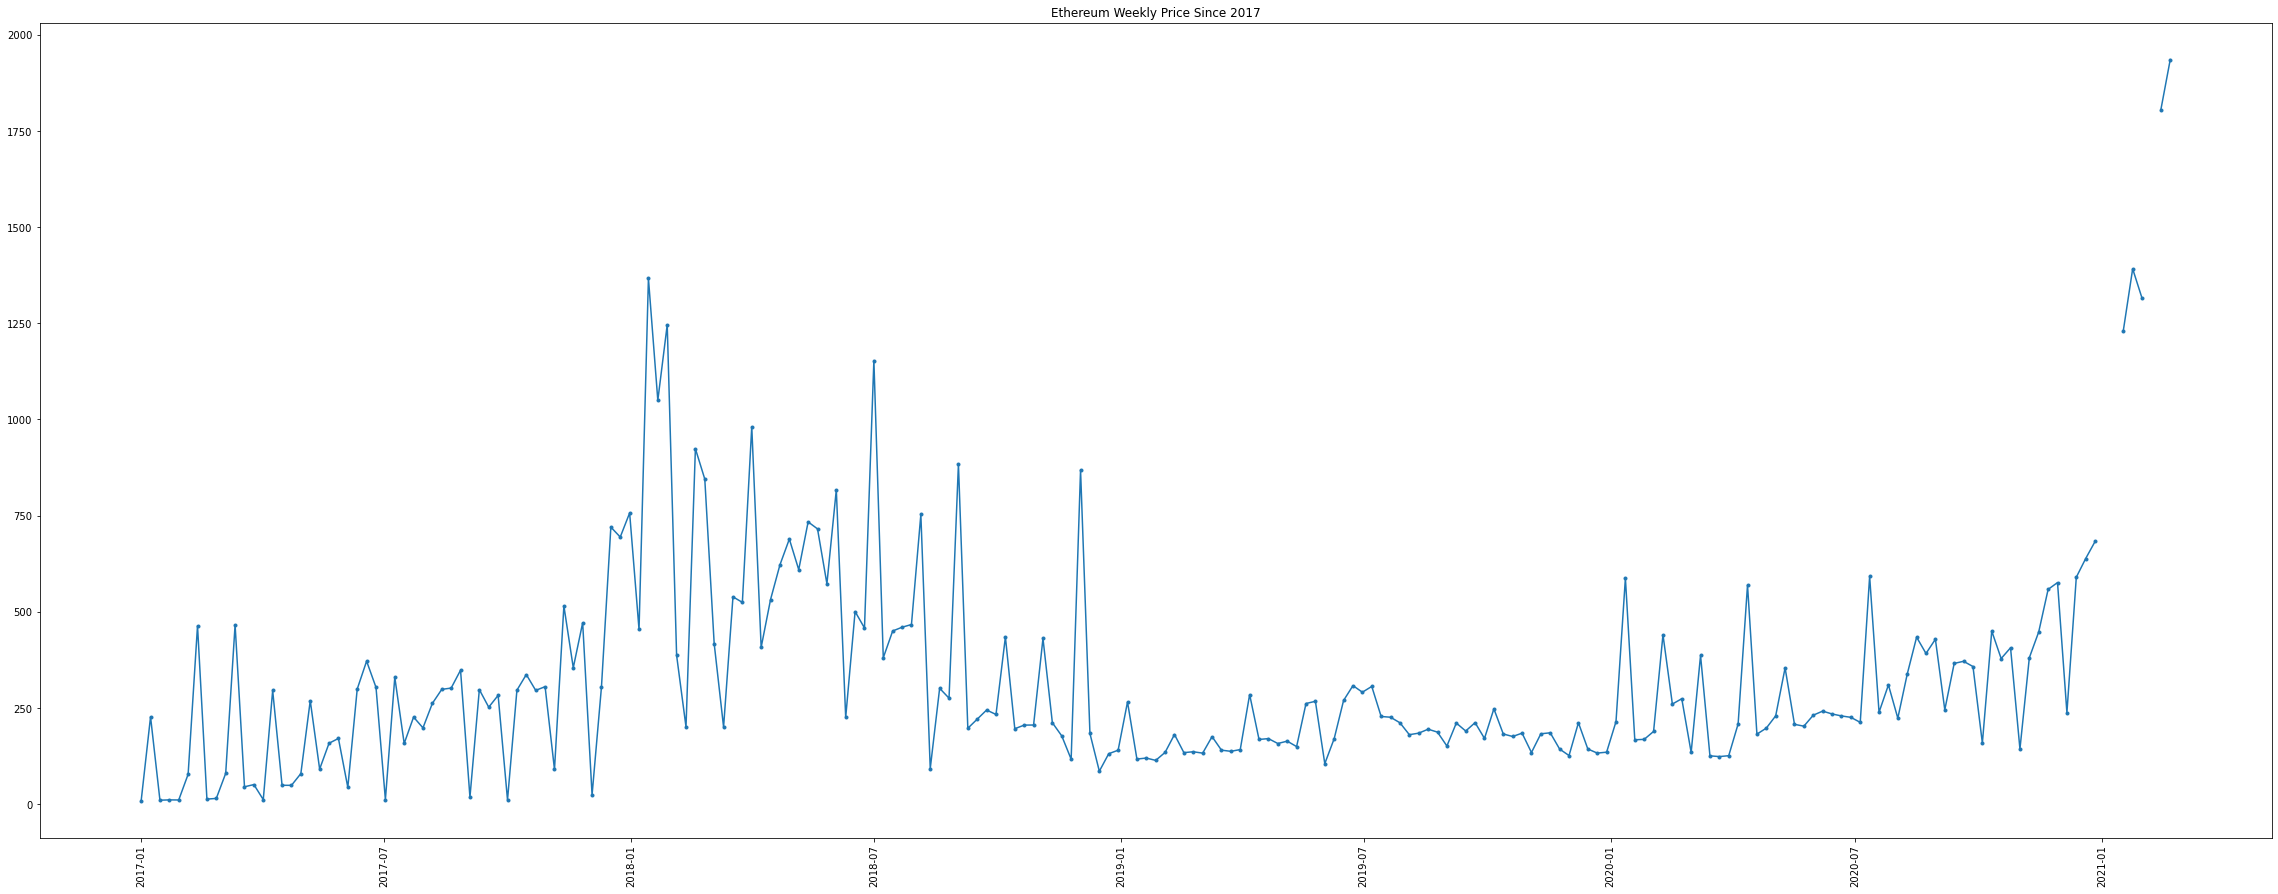

In [182]:
plt.figure(figsize=(40,15))
plt.plot(eth['2017':].asfreq('W').Close, marker='.') # eth['2017':] returns a subset of eth since 2017
plt.title('Ethereum Weekly Price Since 2017')
plt.xticks(rotation=90)
plt.show()

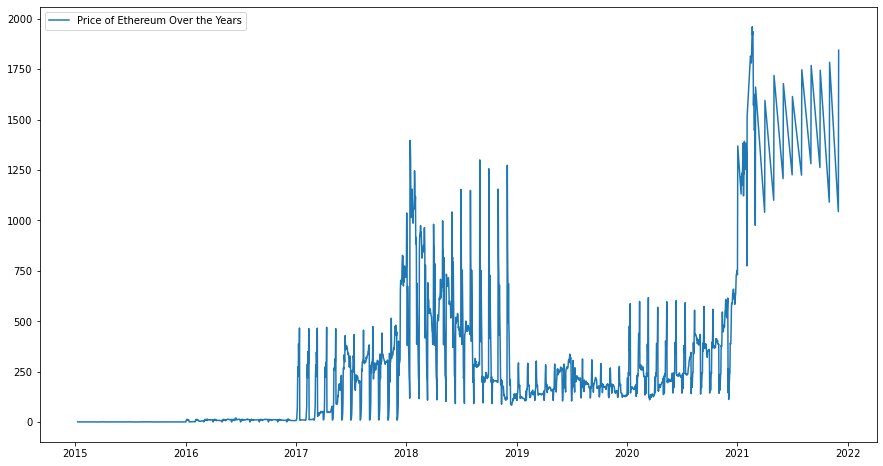

In [212]:
sns.lineplot(data= eth.Close, label = "Price of Ethereum Over the Years")

In [13]:
btc= pd.read_csv("C:\\Users\\Nikhil\\Downloads\\bitcoin daily data.csv", parse_dates=['Date'])
btc.set_index('Date', drop=True, inplace=True)
btc.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2013-04-29,1,Bitcoin,BTC,147.49,134.00,134.44,144.54,0.0,1.603769e+09
2013-04-30,2,Bitcoin,BTC,146.93,134.05,144.00,139.00,0.0,1.542813e+09
2013-01-05,3,Bitcoin,BTC,139.89,107.72,139.00,116.99,0.0,1.298955e+09
2013-02-05,4,Bitcoin,BTC,125.60,92.28,116.38,105.21,0.0,1.168517e+09
2013-03-05,5,Bitcoin,BTC,108.13,79.10,106.25,97.75,0.0,1.085995e+09


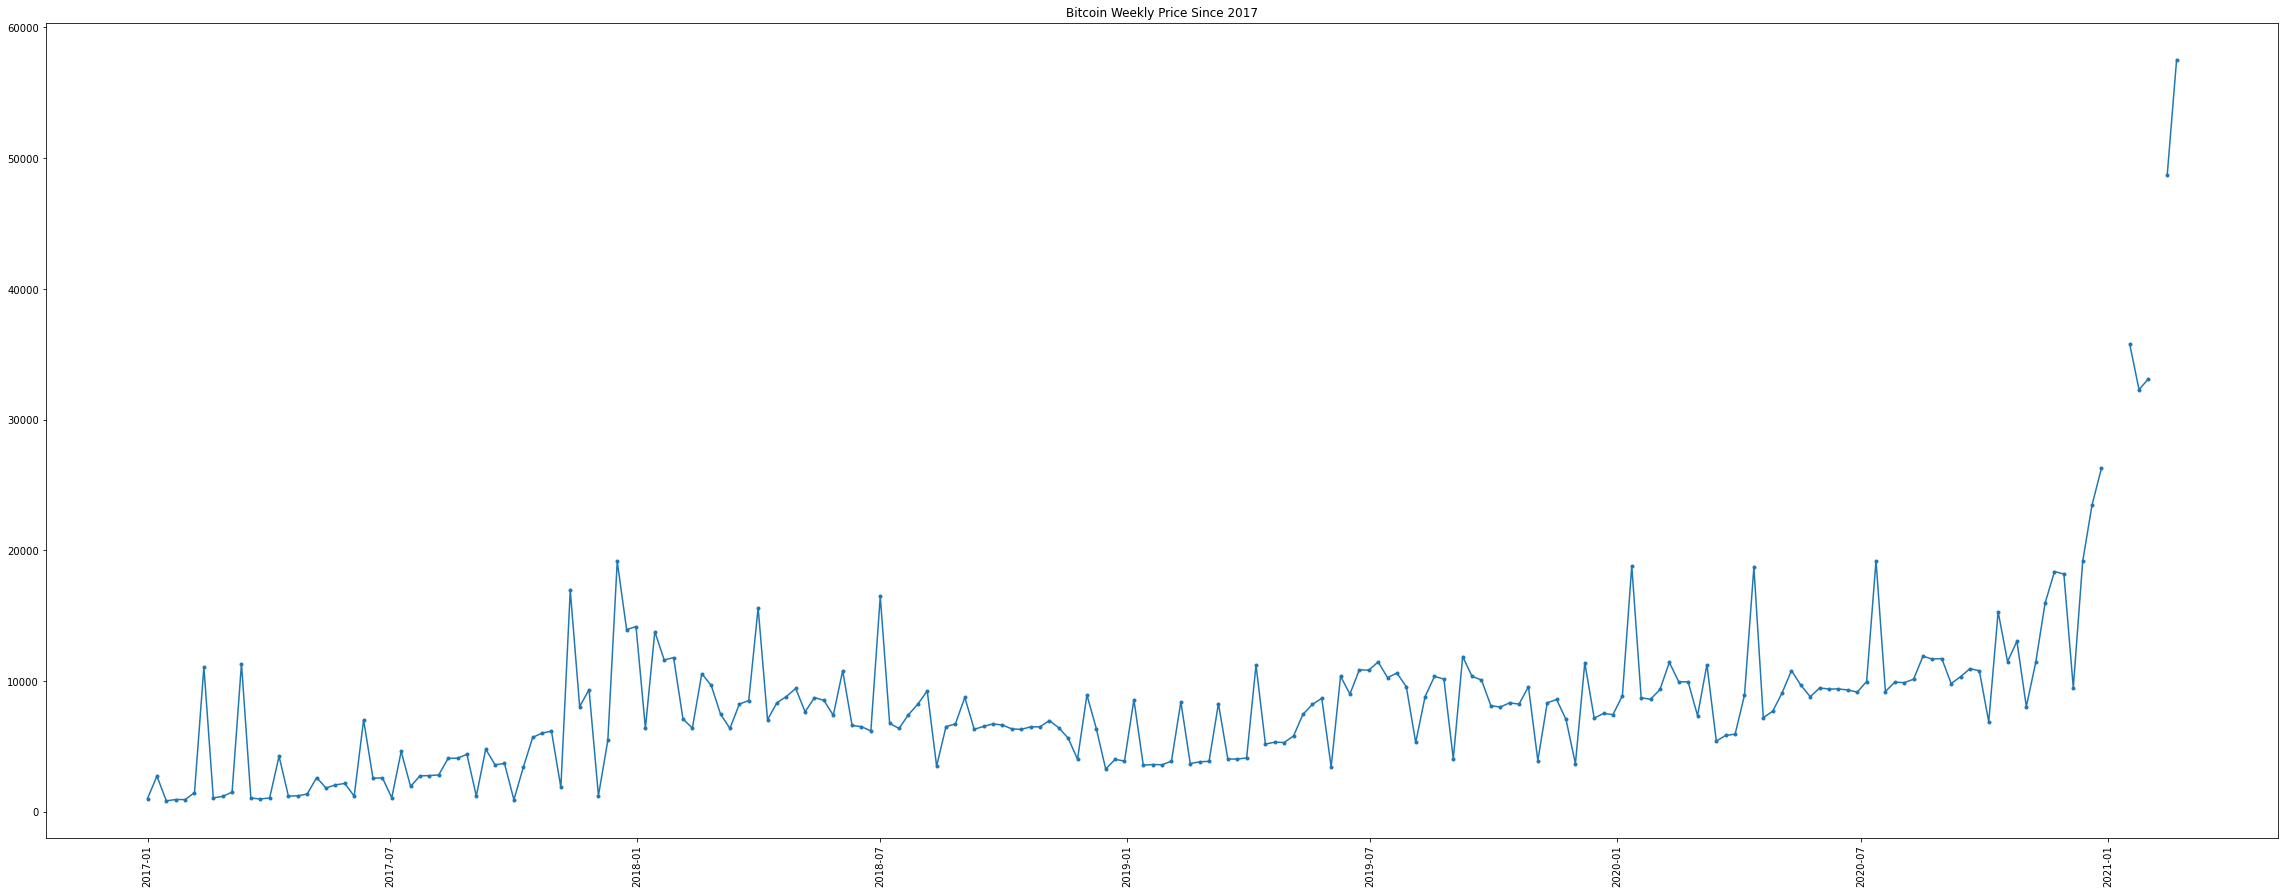

In [181]:
plt.figure(figsize=(40,15))
plt.plot(btc['2017':].asfreq('W').Close, marker='.') # btc['2017':] returns a subset of eth since 2017
plt.title('Bitcoin Weekly Price Since 2017')
plt.xticks(rotation=90)
plt.show()

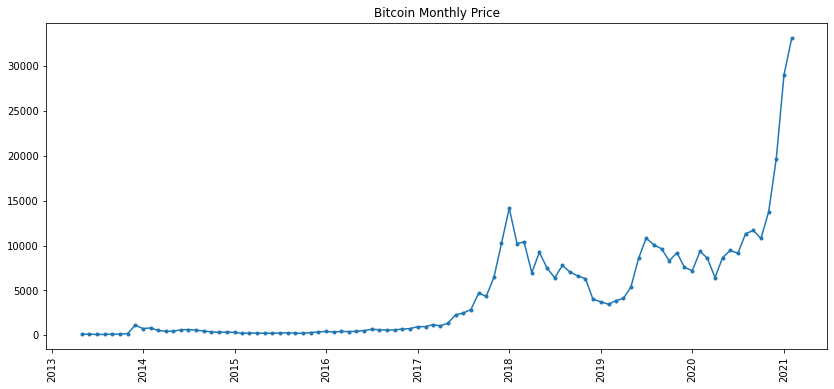

In [209]:
plt.figure(figsize=(14,6))
plt.plot(btc.asfreq('M').Close, marker='.')
plt.title('Bitcoin Monthly Price')
plt.xticks(rotation=90)
plt.show()

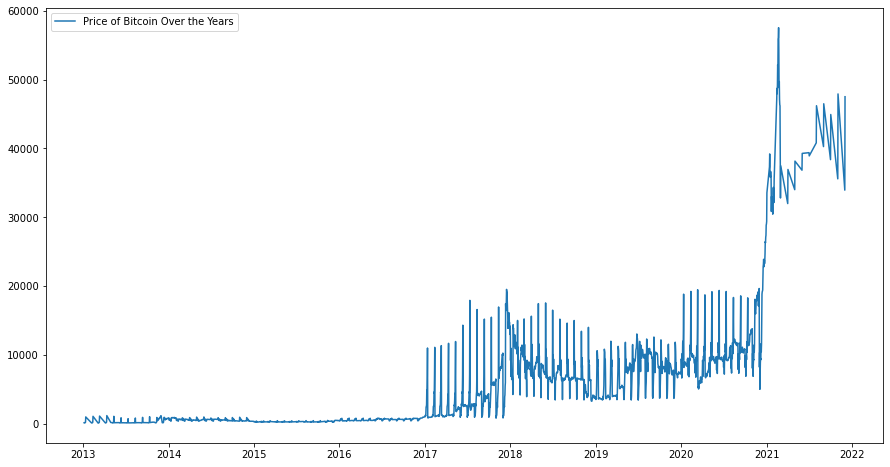

In [211]:
sns.lineplot(data= btc.Close,label = "Price of Bitcoin Over the Years")

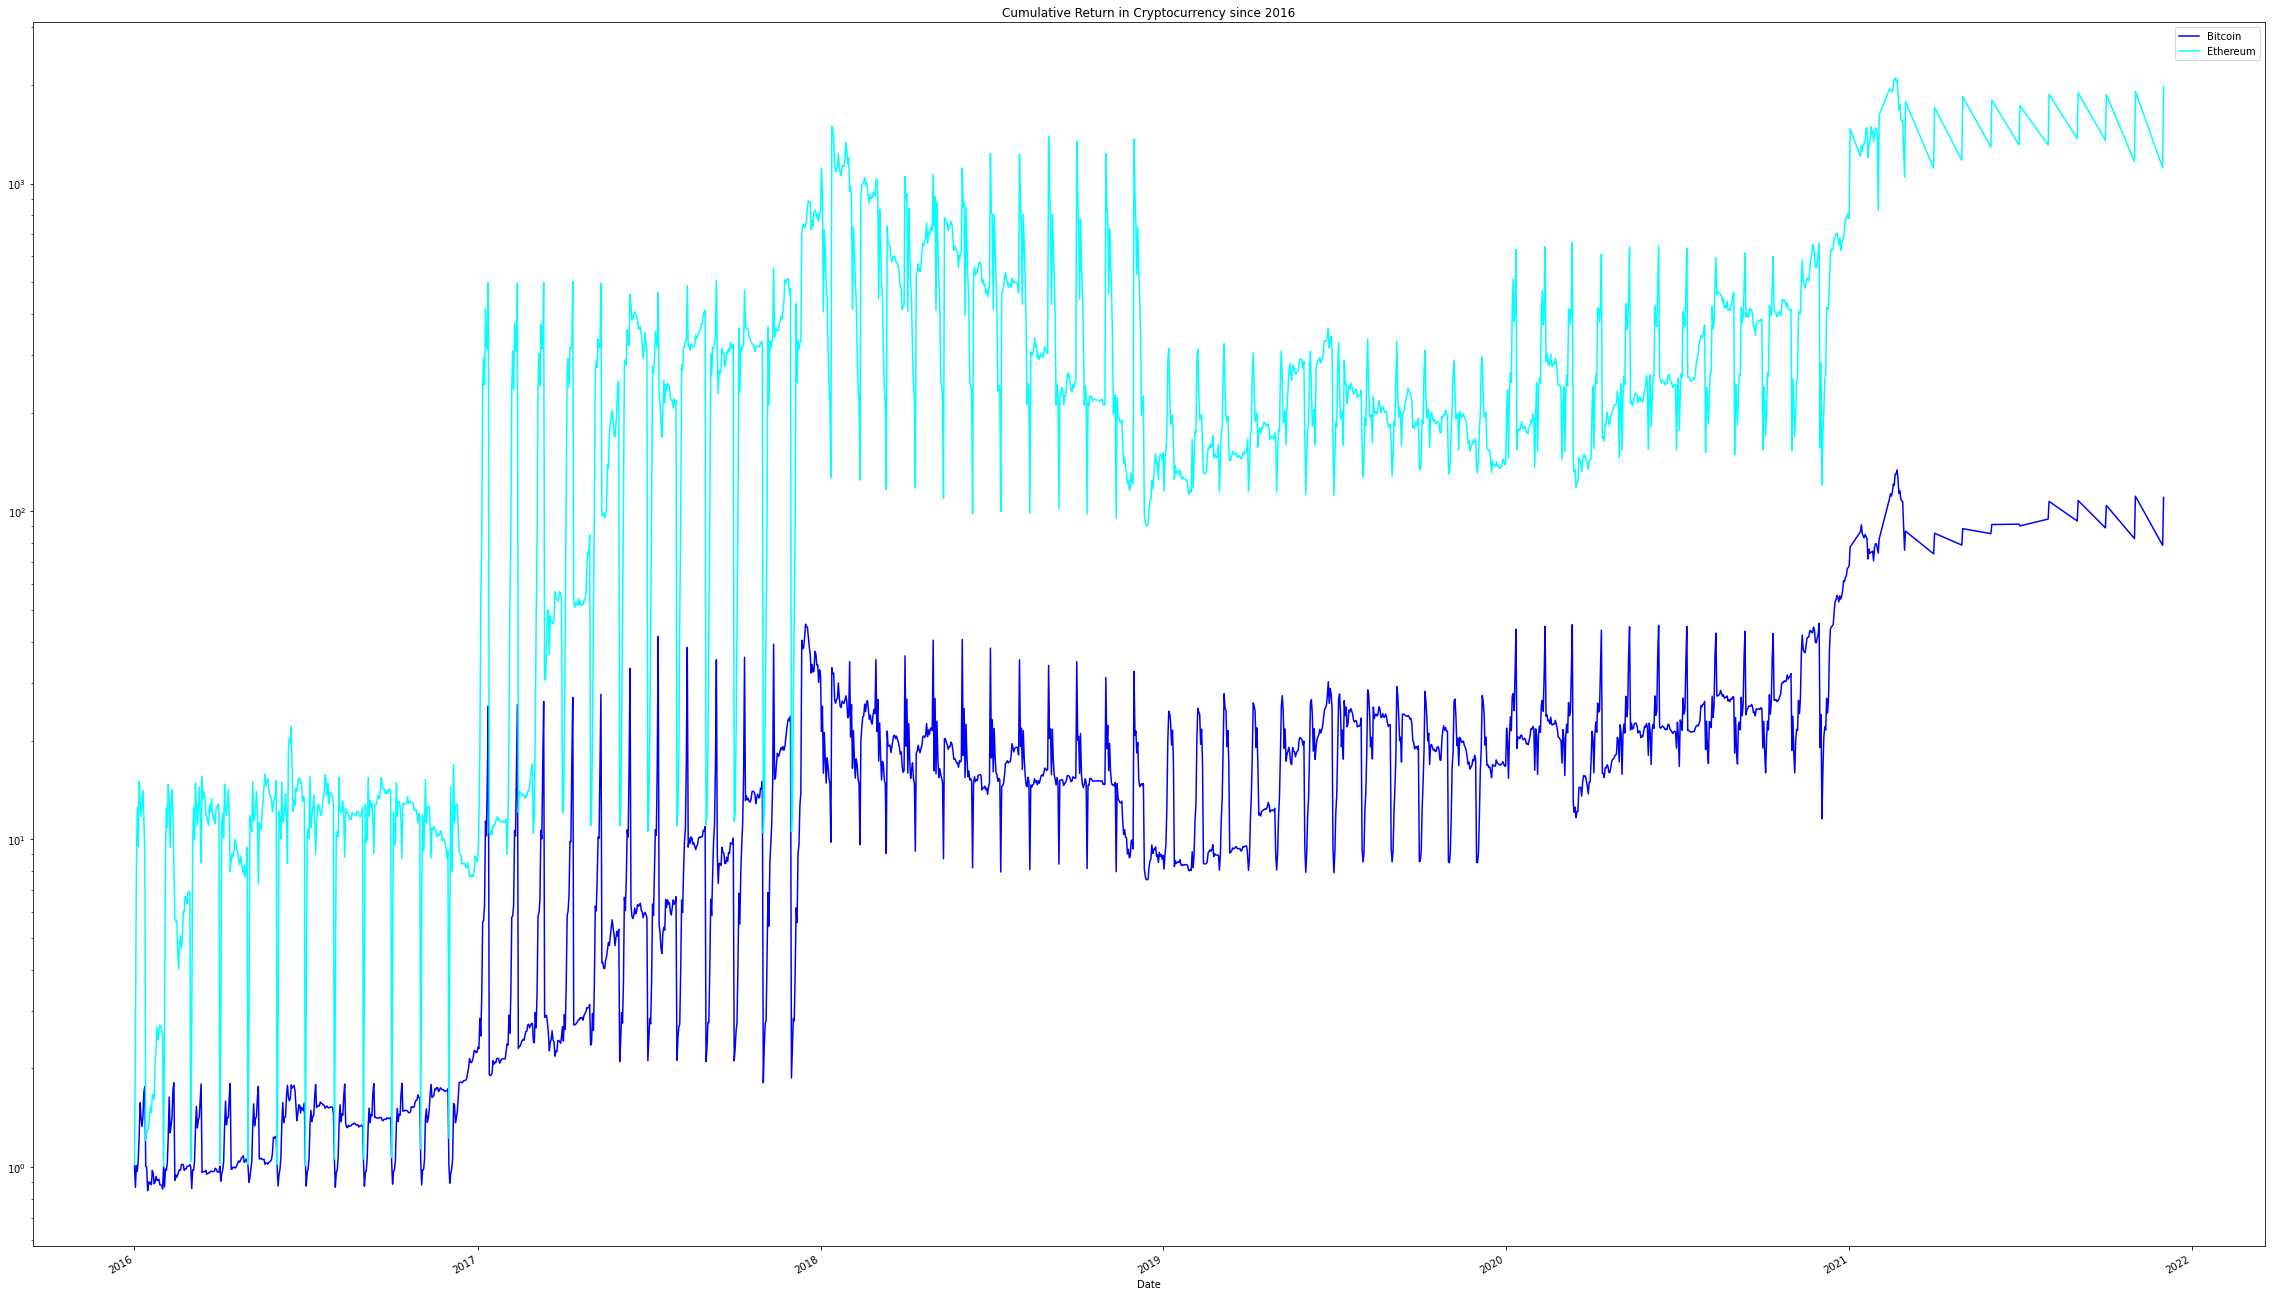

In [216]:
eth_return = eth['2015-12-31':].Close.pct_change()+1
btc_return = btc['2015-12-31':].Close.pct_change()+1
eth_cum = eth_return.cumprod()
btc_cum = btc_return.cumprod()
plt.figure(figsize=(40,25))
btc_cum.plot(c='blue')
eth_cum.plot(c='cyan')
plt.title('Cumulative Return in Cryptocurrency since 2016')
plt.legend(('Bitcoin','Ethereum'))
plt.yscale('log')
plt.show()

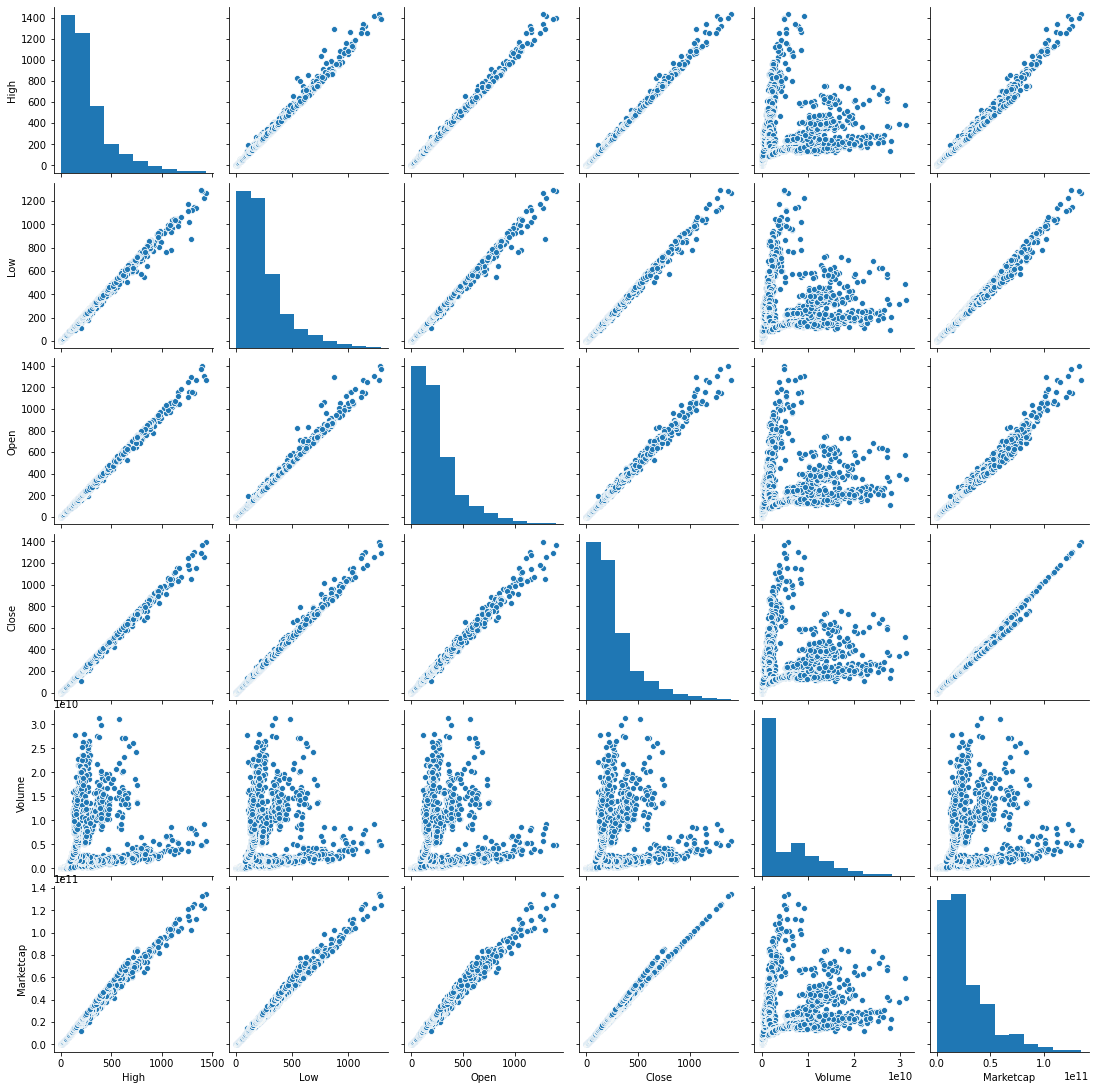

In [18]:
sns.pairplot(eth.loc['2016-01-01':'2021-01-01'])

In [19]:
eth_btc= pd.read_csv("C:\\Users\\Nikhil\\Downloads\\BtcEth.csv", parse_dates=['Date'])
eth_btc.set_index('Date', drop=True, inplace=True)

In [20]:
eth_btc.head()

,High(eth),Low(eth),Open(eth),Close(eth),Volume(eth),Marketcap(eth),High(btc),Low(btc),Open(btc),Close(btc),Volume(btc),Marketcap(btc)
Date,,,,,,,,,,,,
2015-08-08,2.798810,0.714725,2.793760,0.753325,674188,45486894.24,279.93,260.71,279.74,261.00,58533000.0,3.778049e+09
2015-09-08,0.879810,0.629191,0.706136,0.701897,532170,42399573.50,267.00,260.47,261.12,265.08,23789600.0,3.838130e+09
2015-10-08,0.729854,0.636546,0.713989,0.708448,405283,42818364.39,267.03,262.60,265.48,264.47,20979400.0,3.830352e+09
2015-11-08,1.131410,0.663235,0.708087,1.067860,1463100,64569288.43,270.39,264.09,264.34,270.39,25433900.0,3.917143e+09
2015-12-08,1.289940,0.883608,1.058750,1.217440,2150620,73645010.99,270.67,265.47,270.60,266.38,26815400.0,3.859888e+09


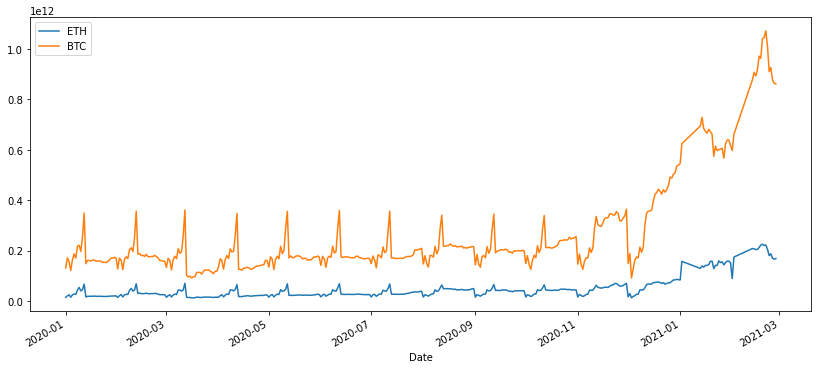

In [187]:
eth_btc['Marketcap(eth)'].loc['2020-01-01':'2021-02-27'].plot(label='ETH', figsize=(14,6))
eth_btc['Marketcap(btc)'].loc['2020-01-01':'2021-02-27'].plot(label='BTC', figsize=(14,6))
plt.legend()

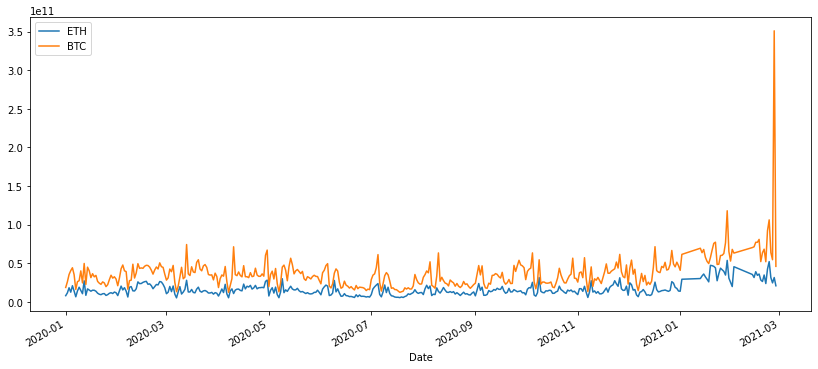

In [192]:
eth_btc['Volume(eth)'].loc['2020-01-01':'2021-02-27'].plot(label='ETH', figsize=(14,6))
eth_btc['Volume(btc)'].loc['2020-01-01':'2021-02-27'].plot(label='BTC', figsize=(14,6))
plt.legend()

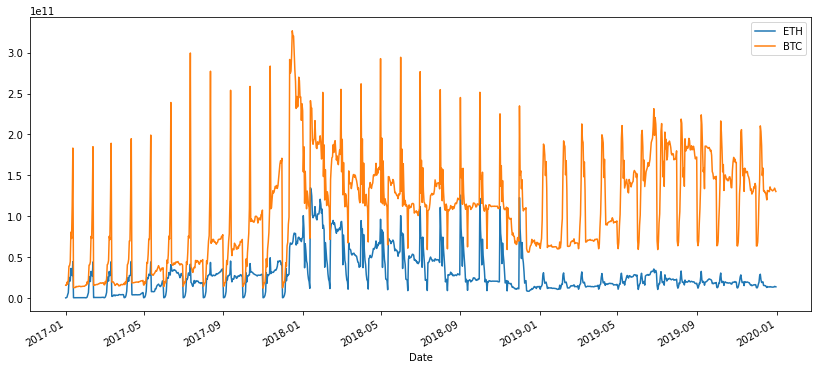

In [188]:
eth_btc['Marketcap(eth)'].loc['2017-01-01':'2019-12-31'].plot(label='ETH', figsize=(14,6))
eth_btc['Marketcap(btc)'].loc['2017-01-01':'2019-12-31'].plot(label='BTC', figsize=(14,6))
plt.legend()

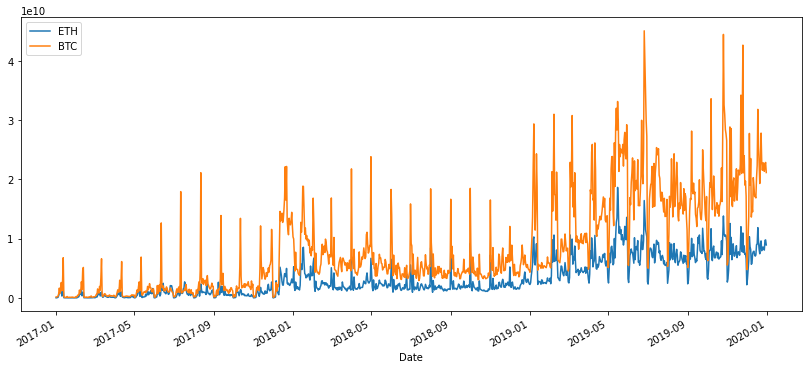

In [191]:
eth_btc['Volume(eth)'].loc['2017-01-01':'2019-12-31'].plot(label='ETH', figsize=(14,6))
eth_btc['Volume(btc)'].loc['2017-01-01':'2019-12-31'].plot(label='BTC', figsize=(14,6))
plt.legend()

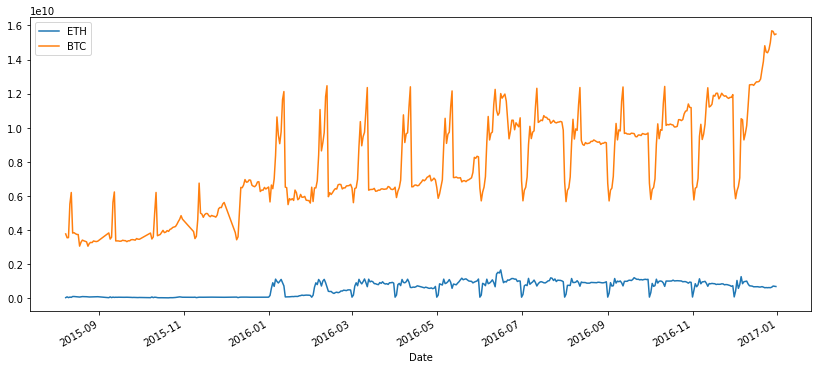

In [189]:
eth_btc['Marketcap(eth)'].loc['2015-08-08':'2016-12-31'].plot(label='ETH', figsize=(14,6))
eth_btc['Marketcap(btc)'].loc['2015-08-08':'2016-12-31'].plot(label='BTC', figsize=(14,6))
plt.legend()

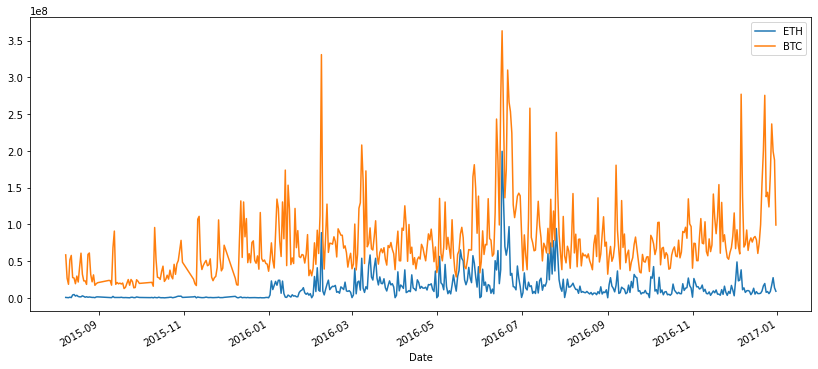

In [190]:
eth_btc['Volume(eth)'].loc['2015-08-08':'2016-12-31'].plot(label='ETH', figsize=(14,6))
eth_btc['Volume(btc)'].loc['2015-08-08':'2016-12-31'].plot(label='BTC', figsize=(14,6))
plt.legend()